In [1]:
from cv2 import imread, imwrite
from pyFusion.fusion import *
from pyFusion.models.vgg19 import VGG19
from pyFusion.models.squeezeNet import Squeeze
from pyFusion.iqa import metrics
from torch import device
from torch.cuda import is_available

import matplotlib.pyplot as plt


In [9]:

# Parse arguments
images_path = ['images/MRI-CT/ct.png', 'images/MRI-CT/mr.png']
output = 'results/T1-T2/'

# Read images
input_images = []
for image in images_path:
    input_images.append(imread(image))

In [3]:

device = device("cuda" if is_available() else "cpu")
model = VGG19(device)
#model = Squeeze(device)

FU = Fusion(input_images, model)
fused_image = FU.fuse()

/mnt/0CDA4207DA41EE10/Cristian/GitHub/Tesi/VirtualEnv/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


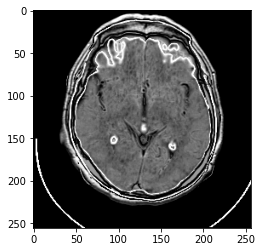

In [4]:
#imwrite("fusion", fused_image.astype('uint8'))
plt.imshow(fused_image, cmap='gray')

In [5]:
# Read images
images = []
for image in images_path:
    images.append(imread(image, 0))

In [6]:
metrics.xydeas_petrovic_metric(images[0], images[1], fused_image)

0.8749952748888219

In [10]:
def weighted_average_fusion(img1, img2, w1, w2):
    '''
    This is the simplest image fusion algorithm. 
    :param img1: The first origin image float values[0-1].
    :param img2: The second origin image float values[0-1].
    :param w1: The weight of first image.
    :param w2: The weight of second image.
    :return: The fusioned image.
    '''
    if w1<0 or w2<0:
        print('invalid weight value')
        return
    elif w1 + w2 != 1:
        w1 = w1/(w1+w2)
        w2 = w2/(w1+w2)
    shape = np.shape(img1)
    img = np.zeros(shape,dtype = np.int8)
    if np.shape(img2) != shape:
        img2 = cv2.resize(img2, np.shape(img1), interpolation = cv2.INTER_CUBIC)
    
    img = w1*img1+w2*img2
    return img

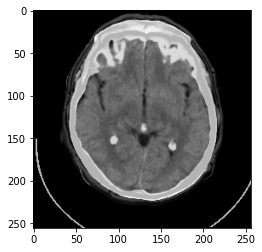

In [20]:
from skimage.color import rgb2gray
im1 = rgb2gray(input_images[0])
im2 = rgb2gray(input_images[1])

weighted_average_fusion_img = weighted_average_fusion(im1, im2,0.7, 0.3)
plt.imshow(weighted_average_fusion_img,cmap=plt.cm.gray, vmin=0, vmax=1)